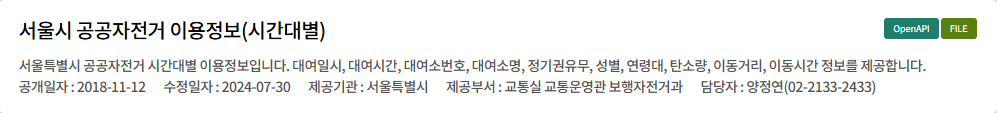
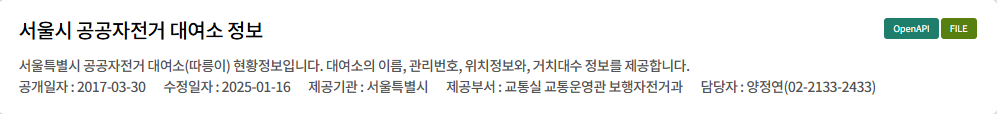
![대여소별 이용정보.png](<attachment:대여소별 이용정보.png>)
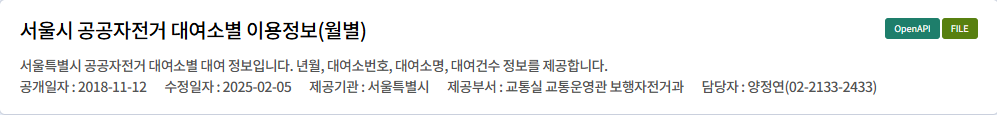

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # 한글폰트
# plt.rcParams["font.family"] = "Malgun Gothic"
# # - 요소 설정
# plt.rcParams["axes.unicode_minus"] = False
import koreanize_matplotlib

import warnings
warnings.simplefilter("ignore")

In [3]:
bike_df = pd.read_excel("./resources/자전거대여소 정보.xlsx", skiprows=4,sheet_name="대여소현황")
bike_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978333,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07 12:09:09,11.0,11.0,QR


In [4]:
bike_use_df = pd.read_csv("./resources/자전거대여소별 이용정보.csv", encoding="cp949")
bike_use_df

,자치구,대여소명,기준년월,대여건수,반납건수
0,마포구,108. 서교동 사거리,202407,1597,1609
1,양천구,729. 서부식자재마트 건너편,202407,1932,2113
2,양천구,731. 서울시 도로환경관리센터,202407,3580,3698
3,양천구,732. 신월중학교,202407,865,865
4,양천구,733. 신정이펜하우스314동,202407,587,401
...,...,...,...,...,...
13665,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),202411,1283,1367
13666,양천구,723. SBS방송국,202411,1930,2092
13667,양천구,724. 계남공원 입구 주출입구 좌측,202411,300,218
13668,양천구,725. 양강중학교앞 교차로,202411,356,279


In [5]:
bike_time_df = pd.read_csv("./resources/자전거시간대별 이용정보.csv", encoding="cp949")
bike_time_df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35
...,...,...,...,...,...,...,...,...,...,...,...,...
2126128,2024-12-31,23,2547,2547. 반포래미안 리오센트,정기권,M,기타,1,143.46,1.05,4528.32,68
2126129,2024-12-31,23,3680,3680. 강동역3번출구,정기권,M,기타,1,0.00,0.00,0.00,2
2126130,2024-12-31,23,240,240. 문래역 4번출구 앞,정기권,M,기타,1,18.28,0.16,710.00,9
2126131,2024-12-31,23,5773,5773. 송파시그니처롯데캐슬,정기권,M,기타,1,39.75,0.36,1544.25,18


In [6]:
bike_df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [7]:
bike_df.columns=['대여소번호','대여소명','자치구','상세주소','위도','경도','설치시기','LCD거치대수','QR거치대수','운영방식']
bike_df.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD거치대수,QR거치대수,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978333,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07 12:09:09,11.0,11.0,QR


#### 데이터 탐색
    - info()
    - describe()
    - shape

In [8]:
bike_df.shape

(2766, 10)

In [9]:
bike_use_df.shape

(13670, 5)

In [10]:
bike_time_df.shape
bike_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126133 entries, 0 to 2126132
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 194.7+ MB


#### 데이터 전처리
 - 컬럼명 변경
 - 필요없는 컬럼 제거
 - 데이터 타입 변경

In [11]:
bike_df.drop(columns=["상세주소", "위도","경도"],inplace=True)
bike_df.head()

,대여소번호,대여소명,자치구,설치시기,LCD거치대수,QR거치대수,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,2015-10-07 12:09:09,11.0,11.0,QR


In [12]:
# bike_df NaN 처리
# 동일한 값으로 채우기 : fillna()

# isna() or isnull()

# 컬럼별 NaN 개수 확인
bike_df.isnull().sum()

대여소번호         0
대여소명          0
자치구           0
설치시기          0
LCD거치대수    1347
QR거치대수     1078
운영방식          0
dtype: int64

In [13]:
bike_df["LCD거치대수"].fillna(0,inplace=True)
bike_df["QR거치대수"].fillna(0, inplace=True)

In [14]:
bike_df.isnull().sum()

대여소번호      0
대여소명       0
자치구        0
설치시기       0
LCD거치대수    0
QR거치대수     0
운영방식       0
dtype: int64

In [15]:
bike_df["대여소번호"].dtype

dtype('int64')

In [16]:
# df 전체 데이터 타입 조회
bike_df.dtypes

대여소번호               int64
대여소명               object
자치구                object
설치시기       datetime64[ns]
LCD거치대수           float64
QR거치대수            float64
운영방식               object
dtype: object

In [17]:
# 타입 변환 - astype(), pd.to_numeric()

bike_df["대여소번호"] = bike_df["대여소번호"].astype(object)

In [18]:
bike_df["대여소번호"].dtype

dtype('O')

In [19]:
# 대여소명 : 숫자, 문자 분리
bike_time_df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35


In [20]:
bike_time_df["대여소번호"]=bike_time_df["대여소명"].str.split(".",expand=True)[0]
bike_time_df["대여소명_new"]=bike_time_df["대여소명"].str.split(".",expand=True)[1]

In [21]:
bike_time_df[bike_time_df["대여소명_new"]==None]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new


In [22]:
bike_use_df

,자치구,대여소명,기준년월,대여건수,반납건수
0,마포구,108. 서교동 사거리,202407,1597,1609
1,양천구,729. 서부식자재마트 건너편,202407,1932,2113
2,양천구,731. 서울시 도로환경관리센터,202407,3580,3698
3,양천구,732. 신월중학교,202407,865,865
4,양천구,733. 신정이펜하우스314동,202407,587,401
...,...,...,...,...,...
13665,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),202411,1283,1367
13666,양천구,723. SBS방송국,202411,1930,2092
13667,양천구,724. 계남공원 입구 주출입구 좌측,202411,300,218
13668,양천구,725. 양강중학교앞 교차로,202411,356,279


In [23]:
bike_use_df["대여소번호"] = bike_use_df["대여소명"].str.split(".",expand=True)[0]
bike_use_df["대여소명_new"] = bike_use_df["대여소명"].str.split(".",expand=True)[1]

In [24]:
bike_use_df[bike_use_df["대여소명_new"].isnull()]

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
6675,성동구,AS센터,202409,3,2,AS센터,None
9409,성동구,AS센터,202410,3,2,AS센터,None


In [25]:
# 대여소명_new - None 행 제거
# None을 찾을 컬럼 지정 : subset
bike_use_df.dropna(subset="대여소명_new",inplace=True)
bike_use_df

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
0,마포구,108. 서교동 사거리,202407,1597,1609,108,서교동 사거리
1,양천구,729. 서부식자재마트 건너편,202407,1932,2113,729,서부식자재마트 건너편
2,양천구,731. 서울시 도로환경관리센터,202407,3580,3698,731,서울시 도로환경관리센터
3,양천구,732. 신월중학교,202407,865,865,732,신월중학교
4,양천구,733. 신정이펜하우스314동,202407,587,401,733,신정이펜하우스314동
...,...,...,...,...,...,...,...
13665,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),202411,1283,1367,722,경서농협 버스정류장(우리은행신정동지점방향)
13666,양천구,723. SBS방송국,202411,1930,2092,723,SBS방송국
13667,양천구,724. 계남공원 입구 주출입구 좌측,202411,300,218,724,계남공원 입구 주출입구 좌측
13668,양천구,725. 양강중학교앞 교차로,202411,356,279,725,양강중학교앞 교차로


In [26]:
# 성별 : NaN

# 성별안의 값들은 어떻게 구성되었는가?
bike_time_df["성별"].unique()
bike_time_df["성별"].value_counts()

성별
M    1050807
F     523055
m        232
f        174
Name: count, dtype: int64

In [27]:
# m => M, f => F

bike_time_df.loc[(bike_time_df["성별"]=="m"),"성별"] = "M"
bike_time_df.loc[(bike_time_df["성별"]=="f"),"성별"] = "F"

In [28]:
bike_time_df["성별"].unique()

array([nan, 'F', 'M'], dtype=object)

In [29]:
bike_time_df["성별"].isnull().sum()

np.int64(551865)

In [30]:
# 운동량, 탄소량 데이터 타입 변환 : float64

bike_time_df.dtypes

대여일자         object
대여시간          int64
대여소번호        object
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량          object
탄소량          object
이동거리(M)     float64
이용시간(분)       int64
대여소명_new     object
dtype: object

In [31]:
# \N 을 -1 로 변경

bike_time_df.loc[bike_time_df["탄소량"] == r"\N","탄소량"] = -1
bike_time_df.loc[bike_time_df["운동량"] == r"\N","운동량"] = -1

In [32]:
# 운동량, 탄소량 데이터 타입 변환 : float64
bike_time_df["탄소량"]=bike_time_df["탄소량"].astype("float64")
bike_time_df["운동량"]=bike_time_df["운동량"].astype("float64")

In [33]:
bike_time_df.dtypes

대여일자         object
대여시간          int64
대여소번호        object
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량         float64
탄소량         float64
이동거리(M)     float64
이용시간(분)       int64
대여소명_new     object
dtype: object

In [34]:
# 대여일자(object) => datetime

bike_time_df["대여일자"] = pd.to_datetime(bike_time_df["대여일자"])

In [35]:
bike_time_df.dtypes
print(bike_time_df["대여일자"].dtype)

datetime64[ns]


#### 데이터 분석
- 이동거리/평균 사용시간이 높은 대여소는?
- 운동량과 이동거리의 상관관계는?
- 따릉이를 가장 많이 사용하는 성별은?
- 서울시 구별 설치 거치대 개수는?
- 서울시 구별 거치대 개수와 대여건수는?

In [36]:
bike_time_df.head()

# 이동거리(M) 평균값이 가장 큰 순서대로 대여소 추출
bike_time_df.groupby("대여소명_new")["이동거리(M)"].mean().reset_index().sort_values("이동거리(M)",ascending=False)

,대여소명_new,이동거리(M)
631,동작역 5번출구 동작주차공원,9878.046280
6,"500번,507번 버스 종점 앞",7032.394895
1467,압구정나들목,6714.258646
2211,흑석역 1번출구,6447.478955
1852,정곡나들목,6233.488745
...,...,...
2007,총신대 앞(육교),1027.911064
2208,휴플러스 수락한신아파트 101동 앞,994.258229
1937,진관동 은빛초등학교,970.629544
1052,상신정비공업 앞,967.305120


In [37]:
bike_time_df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18,중랑구청 중화동 별관 앞
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7,마곡나루역 3번 출구
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21,한국종합기술사옥 앞
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6,송정역 1번출구
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35,방이동 한양3차아파트 옆


In [38]:
# 평균 이용시간(분)이 가장 높은 대여소
bike_time_df.groupby("대여소명_new")[["이용시간(분)","대여시간"]].mean().reset_index().sort_values("이용시간(분)",ascending=False)

,대여소명_new,이용시간(분),대여시간
631,동작역 5번출구 동작주차공원,84.901024,13.795222
2253,강동롯데캐슬퍼스트 아파트(관리동),56.943750,9.603125
2585,여의도 순복음교회,50.204082,16.206633
433,내방역 8번출구 앞,49.231225,13.035573
2478,서울숲 공영주차장앞,47.911765,14.411765
...,...,...,...
1456,안골마을입구,8.571429,13.428571
380,금천현대홈타운 후문 서부샛길,8.567742,9.606452
2271,고덕 래미안힐스테이트(201동),8.364754,12.266393
2411,박석고개(은평소방서) 앞,8.035294,12.658824


In [39]:
bike_time_df.groupby("대여소명_new")[["대여시간"]].mean().reset_index().sort_values("대여시간",ascending=False)

,대여소명_new,대여시간
2488,서울추모공원 입구,17.060606
2729,흥국사 정류장,16.859649
1579,영어마을 관악캠프,16.815789
335,국립항공박물관,16.625714
520,대상연구소,16.487524
...,...,...
2119,한울중학교,9.183673
1194,서초케이타운앞,9.156250
2361,래미안신공덕3차아파트,9.142857
419,난곡종점,8.099042


Text(0.5, 1.0, '이동거리에 따른 운동량(연령대별)')

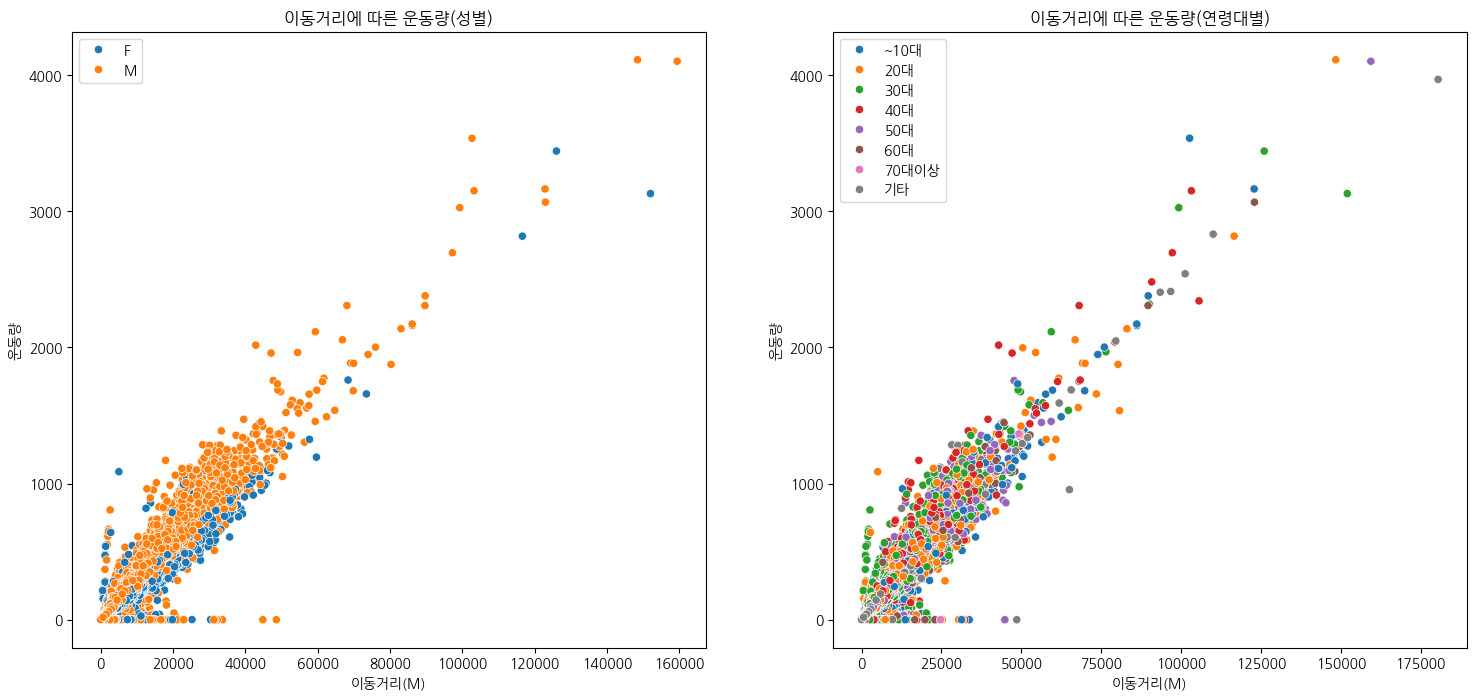

In [40]:
# 이동거리에 따른 운동량(성별)
# 이동거리에 따른 운동량 연령대별

fig, ax = plt.subplots(1,2,figsize=(18,8))

sns.scatterplot(data=bike_time_df, x="이동거리(M)", y="운동량", ax=ax[0], hue="성별")
ax[0].legend(loc="upper left")
ax[0].set_title("이동거리에 따른 운동량(성별)")

sns.scatterplot(data=bike_time_df, x="이동거리(M)", y="운동량", ax=ax[1], hue="연령대코드")
ax[1].legend(loc="upper left")
ax[1].set_title("이동거리에 따른 운동량(연령대별)")

In [41]:
# 대여일자에 따른 남여 대여건수 비교
# 대여일자를 년/월/일 컬럼으로 분리
bike_time_df["대여년"]=bike_time_df["대여일자"].dt.year
bike_time_df["대여월"]=bike_time_df["대여일자"].dt.month
bike_time_df["대여일"]=bike_time_df["대여일자"].dt.day

In [42]:
bike_time_df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new,대여년,대여월,대여일
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18,중랑구청 중화동 별관 앞,2024,12,1
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7,마곡나루역 3번 출구,2024,12,1
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21,한국종합기술사옥 앞,2024,12,1
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6,송정역 1번출구,2024,12,1
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35,방이동 한양3차아파트 옆,2024,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126128,2024-12-31,23,2547,2547. 반포래미안 리오센트,정기권,M,기타,1,143.46,1.05,4528.32,68,반포래미안 리오센트,2024,12,31
2126129,2024-12-31,23,3680,3680. 강동역3번출구,정기권,M,기타,1,0.00,0.00,0.00,2,강동역3번출구,2024,12,31
2126130,2024-12-31,23,240,240. 문래역 4번출구 앞,정기권,M,기타,1,18.28,0.16,710.00,9,문래역 4번출구 앞,2024,12,31
2126131,2024-12-31,23,5773,5773. 송파시그니처롯데캐슬,정기권,M,기타,1,39.75,0.36,1544.25,18,송파시그니처롯데캐슬,2024,12,31


In [45]:
bike_fm=bike_time_df.pivot_table(values="대여시간", columns="성별", index="대여일",aggfunc=sum)

<Axes: title={'center': '일별/성별 자전거 사용시간 비교'}, xlabel='대여일'>

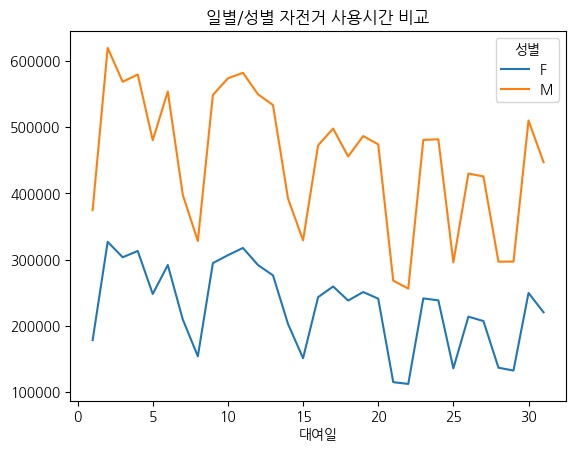

In [47]:
bike_fm.plot(title="일별/성별 자전거 사용시간 비교", rot=0)

In [48]:
# 구별 거치대 개수
bike_df.head()

,대여소번호,대여소명,자치구,설치시기,LCD거치대수,QR거치대수,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,2015-10-07 12:09:09,11.0,11.0,QR


In [50]:
# 총 거치대수 = LCD거치대수 + QR거치대수
bike_df["총 거치대수"] = bike_df["LCD거치대수"]+bike_df["QR거치대수"]
bike_df

,대여소번호,대여소명,자치구,설치시기,LCD거치대수,QR거치대수,운영방식,총 거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07 12:03:46,20.0,20.0,QR,40.0
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07 12:04:22,12.0,12.0,QR,24.0
2,303,광화문역 1번출구 앞,종로구,2015-10-07 00:00:00,8.0,8.0,QR,16.0
3,305,종로구청 옆,종로구,2015-01-07 00:00:00,16.0,16.0,QR,32.0
4,307,서울역사박물관 앞,종로구,2015-10-07 12:09:09,11.0,11.0,QR,22.0
...,...,...,...,...,...,...,...,...
2761,4954,신명초등학교 건너편,강동구,2024-07-22 00:00:00,0.0,15.0,QR,15.0
2762,4956,암사역사공원역 1번출구,강동구,2024-11-18 00:00:00,0.0,5.0,QR,5.0
2763,4957,신명초교 교차로,강동구,2024-09-08 00:00:00,0.0,10.0,QR,10.0
2764,4958,고덕래미안힐스테이트 아파트 211동,강동구,2024-09-24 00:00:00,0.0,10.0,QR,10.0


In [70]:
# 자치구별 총거치대수 합산
bike_sum = bike_df.groupby("자치구")["총 거치대수"].sum().reset_index()
bike_sum = bike_sum.set_index("자치구")
bike_sum

,총 거치대수
자치구,
강남구,1950.0
강동구,1535.0
강북구,640.0
강서구,3073.0
관악구,959.0
광진구,1428.0
구로구,1384.0
금천구,901.0
노원구,1786.0


In [60]:
import json
import folium

geo_path = "./resources/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [71]:

m = folium.Map([37.5502,126.982], zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=bike_sum["총 거치대수"],
    columns=["자치구", "총 거치대수"],
    fill_color="YlGnBu",
    key_on="properties.name",
    legend_name="Number of Parking lots(%)"
).add_to(m)

m